In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [25]:
df = pd.read_csv("dataset\\melb_data.csv")
df = df.dropna(axis=0)
object_columns = df.select_dtypes(include=['object']).columns.tolist()  # Get a list of columns with object type
df.drop(columns=object_columns, inplace=True)  # remove rows with missing values
df.corr()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.533505,0.283885,0.051237,0.951793,0.613853,0.422526,0.098755,0.608215,-0.068122,0.016049,0.088031,-0.111422
Price,0.533505,1.000000,-0.148867,0.125539,0.514561,0.503922,0.261507,0.081419,0.530574,-0.304633,-0.213574,0.211760,-0.046410
Distance,0.283885,-0.148867,1.000000,0.405729,0.290242,0.124530,0.273615,0.059369,0.159603,0.246291,-0.094494,0.221861,-0.083969
Postcode,0.051237,0.125539,0.405729,1.000000,0.053770,0.109804,0.043713,0.025807,0.078483,0.024375,-0.425172,0.471305,0.064534
Bedroom2,0.951793,0.514561,0.290242,0.053770,1.000000,0.617751,0.425726,0.097172,0.593000,-0.056343,0.021309,0.085895,-0.109401
Bathroom,0.613853,0.503922,0.124530,0.109804,0.617751,1.000000,0.340808,0.076295,0.534425,0.157820,-0.072020,0.116103,-0.067126
Car,0.422526,0.261507,0.273615,0.043713,0.425726,0.340808,1.000000,0.117647,0.334282,0.108714,0.011973,0.054699,-0.046487
Landsize,0.098755,0.081419,0.059369,0.025807,0.097172,0.076295,0.117647,1.000000,0.084825,0.026518,0.005610,0.032918,-0.017784
BuildingArea,0.608215,0.530574,0.159603,0.078483,0.593000,0.534425,0.334282,0.084825,1.000000,0.005836,-0.037904,0.103613,-0.066144
YearBuilt,-0.068122,-0.304633,0.246291,0.024375,-0.056343,0.157820,0.108714,0.026518,0.005836,1.000000,0.057108,-0.002114,-0.000797


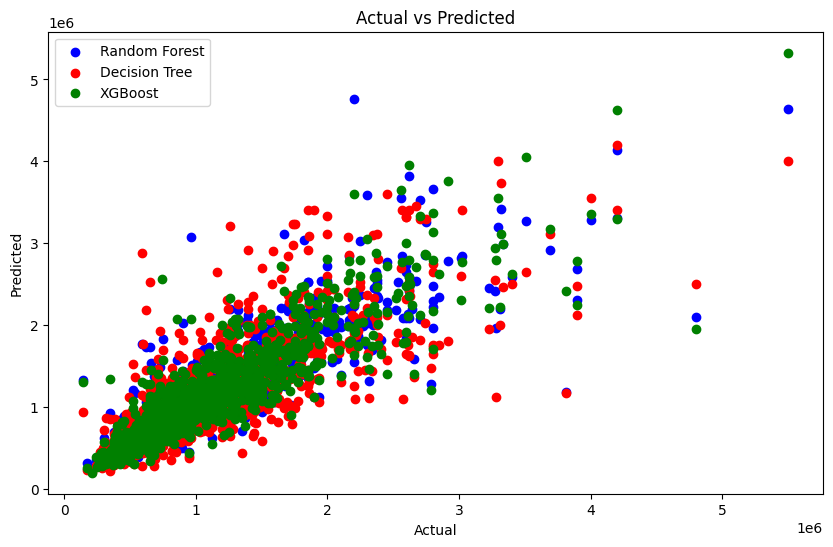

Random Forest MAE: 186545.56207718898
Decision Tree MAE: 258412.1387096774
XGBoost MAE: 186106.01800655242


In [26]:
# Separate features and target
X = df.drop(columns=['Landsize','Propertycount','Price'], axis=1)  # Replace 'target_column' with your target column name
y = df['Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_preds, color='blue', label='Random Forest')
plt.scatter(y_test, dt_preds, color='red', label='Decision Tree')
plt.scatter(y_test, xgb_preds, color='green', label='XGBoost')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Calculate MAE
rf_mae = mean_absolute_error(y_test, rf_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)

print("Random Forest MAE:", rf_mae)
print("Decision Tree MAE:", dt_mae)
print("XGBoost MAE:", xgb_mae)


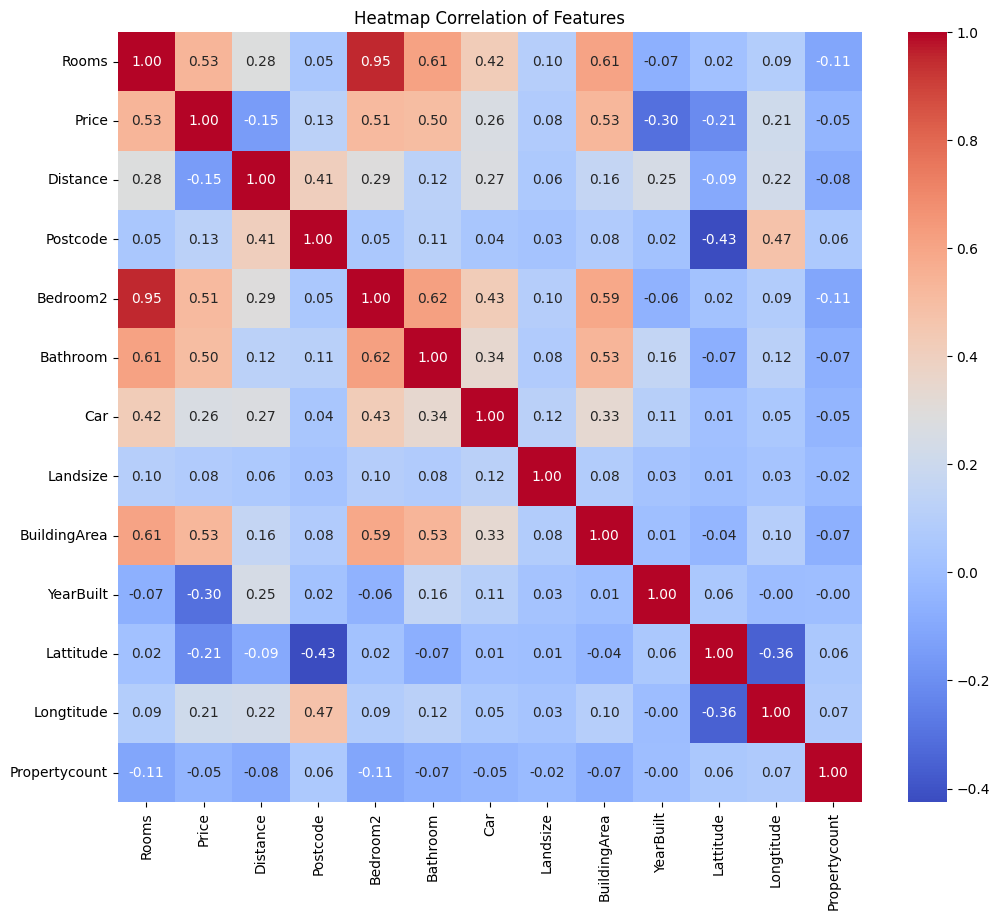

In [28]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation of Features')
plt.show()